# 過学習に関する話題
- 1. わざと過学習を起こしてみる
- 2. weight decay

## 1. わざと過学習を起こしてみる
過学習が発生する条件を揃えて、過学習を起こしてみる。
1. パラメータを大量に持ち、表現力の高いモデルである
2. 訓練データが少ない

最初の条件1は、ニューラルネットワークでは層を増やせば良い。条件２は書いて字のごとくである。テキストではＭＮＩＳＴの訓練画像数を300に設定してためしている。

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD, Adam
#%matplotlib notebook

In [2]:
#トレーニングデータを少なく（３００個）指定してトレーニングさせ、過学習状況を作る
#引数には、weight_decayを使用するかどうかを指定する
def try_train(weight_decay_lambda = 0):
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

    #過学習を発生させるため、訓練データを300に削減
    all_train_size = 300
    x_train = x_train[:all_train_size]
    t_train = t_train[:all_train_size]

    #ニューラルネットワークを作成する、入力層１、隠れ層６の合計７層のネットワークを作成する
    net = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size = 10,weight_decay_lambda=weight_decay_lambda)
    optimizer = SGD(lr=0.01)

    train_size = x_train.shape[0]
    batch_size = 100

    train_loss_list = []
    train_acc_list  = []
    test_acc_list   = []

    max_epochs = 201
    #max_epochs = 2
    iter_per_epoch = max(train_size / batch_size , 1)
    epoch_cnt = 0
    loop_max = 1000000000 #10億回を設定

    print("=== parameters===")
    print("iter_per_epoch %d" %(iter_per_epoch))

    for i in range(loop_max):
        batch_mask = np.random.choice(train_size, batch_size)

        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grads = net.gradient(x_batch, t_batch)
        optimizer.update(net.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = net.accuracy(x_train, t_train)
            test_acc  = net.accuracy(x_test, t_test)

            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

            print("i_count:" + str(i) + " epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    #X軸の値を用意
    x = np.arange(len(train_acc_list))

    #plotの設定
    plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
    plt.plot(x, test_acc_list , marker="s", label="test" , markevery=10)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc="lower right")
    plt.figure()
    plt.show()


=== parameters===
iter_per_epoch 3
i_count:0 epoch:0, train acc:0.12333333333333334, test acc:0.1385
i_count:3 epoch:1, train acc:0.13, test acc:0.1479
i_count:6 epoch:2, train acc:0.13333333333333333, test acc:0.1564
i_count:9 epoch:3, train acc:0.17333333333333334, test acc:0.1615
i_count:12 epoch:4, train acc:0.19666666666666666, test acc:0.1702
i_count:15 epoch:5, train acc:0.20333333333333334, test acc:0.1815
i_count:18 epoch:6, train acc:0.25333333333333335, test acc:0.2004
i_count:21 epoch:7, train acc:0.26666666666666666, test acc:0.2177
i_count:24 epoch:8, train acc:0.3, test acc:0.2303
i_count:27 epoch:9, train acc:0.32, test acc:0.2449
i_count:30 epoch:10, train acc:0.3433333333333333, test acc:0.2581
i_count:33 epoch:11, train acc:0.37, test acc:0.2712
i_count:36 epoch:12, train acc:0.38333333333333336, test acc:0.2869
i_count:39 epoch:13, train acc:0.43, test acc:0.3182
i_count:42 epoch:14, train acc:0.44, test acc:0.3347
i_count:45 epoch:15, train acc:0.5033333333333333, 

i_count:417 epoch:139, train acc:1.0, test acc:0.7634
i_count:420 epoch:140, train acc:1.0, test acc:0.7627
i_count:423 epoch:141, train acc:1.0, test acc:0.7628
i_count:426 epoch:142, train acc:1.0, test acc:0.7632
i_count:429 epoch:143, train acc:1.0, test acc:0.7625
i_count:432 epoch:144, train acc:1.0, test acc:0.7649
i_count:435 epoch:145, train acc:1.0, test acc:0.7629
i_count:438 epoch:146, train acc:1.0, test acc:0.7622
i_count:441 epoch:147, train acc:1.0, test acc:0.7611
i_count:444 epoch:148, train acc:1.0, test acc:0.7634
i_count:447 epoch:149, train acc:1.0, test acc:0.7635
i_count:450 epoch:150, train acc:1.0, test acc:0.7617
i_count:453 epoch:151, train acc:1.0, test acc:0.762
i_count:456 epoch:152, train acc:1.0, test acc:0.7626
i_count:459 epoch:153, train acc:1.0, test acc:0.7635
i_count:462 epoch:154, train acc:1.0, test acc:0.7632
i_count:465 epoch:155, train acc:1.0, test acc:0.7614
i_count:468 epoch:156, train acc:1.0, test acc:0.7622
i_count:471 epoch:157, train 

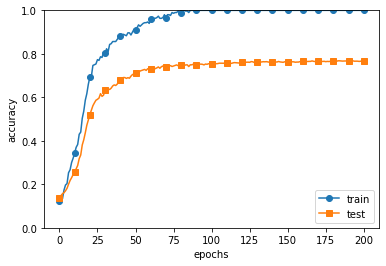

<Figure size 432x288 with 0 Axes>

In [3]:
try_train(0)

これを見ると、訓練データは正確性が1.0に近づくが、逆にテストデータが0.7程度になり、正解率が低い状態。これが過学習の状態。次にweigh decayを試してみる。

## weight decay
weight decayは大きな重みに対してペナルティを与えることで、大きな重みを抑制することで過学習を抑制するもの。重み$\boldsymbol{W}$のL2ノルムである$\boldsymbol{W}^2$を損失関数に加える。実装上ではweight decayの調整パラメータ（ハイパーパラメータ）である$\lambda$と微分結果の調整用の$\frac{1}{2}$を掛けた$\frac{1}{2}\lambda\boldsymbol{W}^2$を損失関数の出力結果に加える。$\frac{1}{2}\lambda\boldsymbol{W}^2$は重みが大きくなれば大きい値が損失関数に加わり、重みが小さくなれば小さい値が損失関数に加わることになるので、損失関数を小さくする方向に学習が進むことになるから、重みの大きさも自然に小さくなるというもの。$\lambda$を大きくすればするほど、大きい重みに強いペナルティを課すことになる。
### コードから動きを見てみる

### forward方向

In [5]:
#common/multi_layer_net.pyよりコードの抜粋
def loss(self, x, t):
    """損失関数を求める

    Parameters
    ----------
    x : 入力データ
    t : 教師ラベル

    Returns
    -------
    損失関数の値
    """
    y = self.predict(x)

    weight_decay = 0
    for idx in range(1, self.hidden_layer_num + 2):
        W = self.params['W' + str(idx)]
        weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

    return self.last_layer.forward(y, t) + weight_decay

weight_decayの計算はloss関数の内部で行われている。$\boldsymbol{W}^2$を行い、$\boldsymbol{W}$の各要素を２乗しているものの和をとっている。これはL2ノルムそのもの

### backward方向

In [ ]:
#common/multi_layer_net.pyよりコードの抜粋

def gradient(self, x, t):
    """勾配を求める（誤差逆伝搬法）

    Parameters
    ----------
    x : 入力データ
    t : 教師ラベル

    Returns
    -------
    各層の勾配を持ったディクショナリ変数
        grads['W1']、grads['W2']、...は各層の重み
        grads['b1']、grads['b2']、...は各層のバイアス
    """
    # forward
    self.loss(x, t)

    # backward
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
        dout = layer.backward(dout)

    # 設定
    grads = {}
    for idx in range(1, self.hidden_layer_num+2):
        grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
        grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

    return grads


重みの微分に$\frac{1}{2}\lambda\boldsymbol{W}^2$の微分である$\lambda\boldsymbol{W}$を加えていることがわかる。
さて、次はweight decayの効果を試してみる。

### weight decayの効果

=== parameters===
iter_per_epoch 3
i_count:0 epoch:0, train acc:0.15333333333333332, test acc:0.1229
i_count:3 epoch:1, train acc:0.17333333333333334, test acc:0.1355
i_count:6 epoch:2, train acc:0.2, test acc:0.152
i_count:9 epoch:3, train acc:0.24666666666666667, test acc:0.1776
i_count:12 epoch:4, train acc:0.28, test acc:0.2077
i_count:15 epoch:5, train acc:0.31333333333333335, test acc:0.232
i_count:18 epoch:6, train acc:0.32, test acc:0.2454
i_count:21 epoch:7, train acc:0.3433333333333333, test acc:0.2629
i_count:24 epoch:8, train acc:0.34, test acc:0.2737
i_count:27 epoch:9, train acc:0.36, test acc:0.2854
i_count:30 epoch:10, train acc:0.3933333333333333, test acc:0.3002
i_count:33 epoch:11, train acc:0.4066666666666667, test acc:0.314
i_count:36 epoch:12, train acc:0.4066666666666667, test acc:0.3227
i_count:39 epoch:13, train acc:0.4266666666666667, test acc:0.3362
i_count:42 epoch:14, train acc:0.44666666666666666, test acc:0.3508
i_count:45 epoch:15, train acc:0.4766666666

i_count:393 epoch:131, train acc:0.8833333333333333, test acc:0.6998
i_count:396 epoch:132, train acc:0.8933333333333333, test acc:0.7148
i_count:399 epoch:133, train acc:0.9066666666666666, test acc:0.7089
i_count:402 epoch:134, train acc:0.8866666666666667, test acc:0.7162
i_count:405 epoch:135, train acc:0.9033333333333333, test acc:0.7186
i_count:408 epoch:136, train acc:0.8866666666666667, test acc:0.7066
i_count:411 epoch:137, train acc:0.8733333333333333, test acc:0.7031
i_count:414 epoch:138, train acc:0.8666666666666667, test acc:0.7073
i_count:417 epoch:139, train acc:0.88, test acc:0.7148
i_count:420 epoch:140, train acc:0.8866666666666667, test acc:0.7185
i_count:423 epoch:141, train acc:0.8933333333333333, test acc:0.717
i_count:426 epoch:142, train acc:0.8866666666666667, test acc:0.7124
i_count:429 epoch:143, train acc:0.8866666666666667, test acc:0.7139
i_count:432 epoch:144, train acc:0.89, test acc:0.7054
i_count:435 epoch:145, train acc:0.8833333333333333, test acc:0

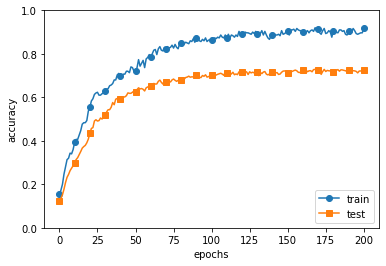

<Figure size 432x288 with 0 Axes>

In [4]:
try_train(0.1)

これを見ると、訓練データの時とテストデータの時の差が狭くなっている。ただ、テストデータの正解率は向上していないのだが。